# Decision Tree (의사 결정 나무)
- 데이터를 분류하거나 회귀하기 위해 조건 분할을 반복하여 트리를 형성하는 모델
- Root Node에서 시작 -> 조건식을 이용하여 참/거짓 데이터를 반복적으로 분할 -> Leaf Node로 내려가면서 최종 예측 수행
- 사람이 해석하기 쉬운 모델로, 앙상블 기법(예: 랜덤 포레스트, 부스팅 계열)의 기본 학습기로 널리 활용된다.
- 특성(feature)의 값을 기준으로 데이터 분할을 수행하며, 분할 기준을 찾는 것이 핵심 과정.

- 불순도 (Impurity)
    - **분류 (Classification)**
    </br>: 노드가 얼마나 섞여 있는지 측정
        - **gini** : 지니 계수 (Gini Impurity). 불순도 측정에 가장 일반적으로 쓰이는 기준
        - **entropy** : 엔트로피 (Entropy). 정보 이득(Information Gain)을 최대화하는 방향으로 분할하며, gini에 비해 계산량이 더 많음
        - log_loss : 로그 손실 <span style="color:#808080">(참고: scikit-learn의 criterion 기본 옵션은 아니며, 오차 측정 지표로 주로 활용됨)</span>
    - **회귀 (Regression)**
    </br>: 노드 내 값들의 오차 또는 분산이 얼마나 큰지를 측정하며, 분산 감소를 목표로 함
        - **squared_error** (MSE) : 평균 제곱 오차. 분할 후 각 노드의 분산 감소량을 최대화
        - **absolute_error** (MAE) : 평균 절대 오차. 이상치에 MSE보다 덜 민감함
        - **friedman_mse** : 분산 감소 기반. MSE를 변형한 기준으로, 분할 개선도를 계산할 때 Friedman의 개선 지표를 사용.

- **매개 변수**
    - <span style="color:#ffd33d">**criterion**</span>
        - 분류
            - 노드를 분할할 때 사용할 불순도의 계산 방법 지정
            - 기본값: gini
                - **gini** : 지니 계수
                - **entropy** : 성능 향상 (계산 복잡도로 인해 속도가 느려질 수 있음)
                - log_loss : 확률적 분류
        - 회귀
            - 기준을 불순도의 오차로 볼 것인가, 분산으로 볼 것인가?
            - 기본값: squared_error
                - squared_error : 평균 제곱 오차 (MSE)
                - absolute_error : 평균 절대 오차 (MAE)
                - friedman_mes : 분산 감소 기반 (MSE를 변형한 기준. 일부 데이터셋에서 더 나은 결과를 낼 수 있음.)
    - <span style="color:#ffd33d">**spliter**</span>
        </br>: 노드를 분할할 때 최적의 분할 지점(feature)을 찾는 방식
        - 기본값: best
            - best : 모든 후보 분할 지점 중 가장 불순도 감소량이 큰 것을 선택. 단일 Decision Tree에서 최적.
            - random : 무작위로 일부 분할 지점을 선택하여 최적 지점 탐색. 앙상블 모델의 다양성을 높이는 데 유용.
    - <span style="color:#ffd33d">**max_depth**</span>
        </br>: 트리의 최대 깊이 제한
        - 규제를 통한 과적합 방지에 가장 중요한 매개변수 중 하나.
        - 기본값: None
            - None : Leaf 노드가 순수해질 때까지 계속 분할 -> 과적합 위험
    - <span style="color:#ffd33d">**min_samples_split**</span>
        </br>: node를 분할하기 위한 최소한의 샘플 개수 지정
        - 이 개수보다 적으면 분할을 멈춤.
        - 기본값: 2
    - <span style="color:#ffd33d">**min_samples_leaf**</span>
        </br>: Leaf node가 되기 위한 최소 샘플 수
        - 분할 후 자식 노드들이 이 개수 미만이면 분할을 수행하지 않음.
        - 기본값: 1
    - <span style="color:#ffd33d">**max_features**</span>
        </br>: 최적으로 분할 시 고려할 feature의 개수 제한 (분할할 때마다 무작위로 선택할 특성 개수)
        - 과적합 문제 완화 및 앙상블 모델의 다양성 확보에 기여.
        - 기본값: **None** (회귀), **"sqrt"** (분류)
            - None : 모든 feature 사용
            - sqrt : √(feature의 수) 만큼 사용
            - log2 : log2(feature의 수) 만큼 사용 <span style="color:#808080">(랜덤 포레스트 분류의 기본값과 유사)
            - 숫자 : 고정된 값 사용 (int, float(0~1))
    - <span style="color:#ffd33d">**min_impurity_decrease**</span>
        </br>: 노드를 분할했을 때 불순도 감소량이 이 값 이상일 때만 분할 수행
        - 이 값이 높을수록 가지치기(Pre-Pruning) 효과가 커져 트리가 단순해짐.
        - 기본값: 0.0
    - <span style="color:#ffd33d">**ccp_alpha**</span>
        </br>: 비용 대비 복잡도 가지치기 (Cost-Complexity Pruning) 매개 변수
        - 값이 커지면 분할 비용(Cost)을 높여 트리의 **단순화(가지치기, Post-Pruning)** 진행됨. 모델 튜닝에 매우 유용한 매개변수.
        - 기본값: 0.0

- **속성**
    - <span style="color:#ffd33d">**tree_**</span>
        </br>: 학습된 트리 구조에 대한 상세 정보가 담긴 내부 객체. (디버깅이나 심화 분석에 사용)
    - <span style="color:#ffd33d">**classes_**</span>
        </br>: 분류 문제에서 모델이 인식한 클래스 라벨의 목록 (순서대로)
    - <span style="color:#ffd33d">**n_classes_**</span>
        </br>: 분류 문제에서 클래스의 총 개수
    - <span style="color:#ffd33d">**n_features_in_**</span>
        </br>: 모델 학습에 입력된 데이터의 피쳐(컬럼) 개수
    - <span style="color:#ffd33d">**feature_importances_**</span>
        </br>: 각 피쳐들이 모델의 예측에 기여한 중요도(불순도 감소 기여도). 모든 중요도의 합은 1로 고정.

- **메소드** (함수)
    - <span style="color:#ffd33d">**fit(X, y)**</span>
        </br>: 모델 학습 <span style="color:#808080">(독립 변수 X, 종속 변수 y)
    - <span style="color:#ffd33d">**predict(X)**</span>
        </br>: 예측값 생성
        - <span style="color:#808080">데이터 X에 대한 최종 예측값(클래스 라벨 또는 회귀 값)을 생성
    - <span style="color:#ffd33d">**predict_proba(X)**</span>
        </br>: 각 클래스별로 예측될 확률 반환. (주로 분류 모델에서 사용)
    - <span style="color:#ffd33d">**score(X, y)**</span>
        </br>: 모델 성능 평가
        - <span style="color:#808080">테스트 데이터 X와 실제 값 y를 사용
        - 분류에서는 (Accuracy), 회귀에서는 R2-Score 반환
    - <span style="color:#ffd33d">**export_graphviz**</span>
        </br>: 학습된 트리 구조 시각화

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

In [19]:
iris = pd.read_csv('../data/iris.csv')
iris.head(1)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa


In [20]:
target_list = iris['target'].unique()

In [21]:
for i, target in enumerate(target_list):
    iris['target'] = iris['target'].replace(target, i)

iris['target'].unique()

C:\Users\student\AppData\Local\Temp\ipykernel_6848\3189943013.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['target'] = iris['target'].replace(target, i)


array([0, 1, 2])

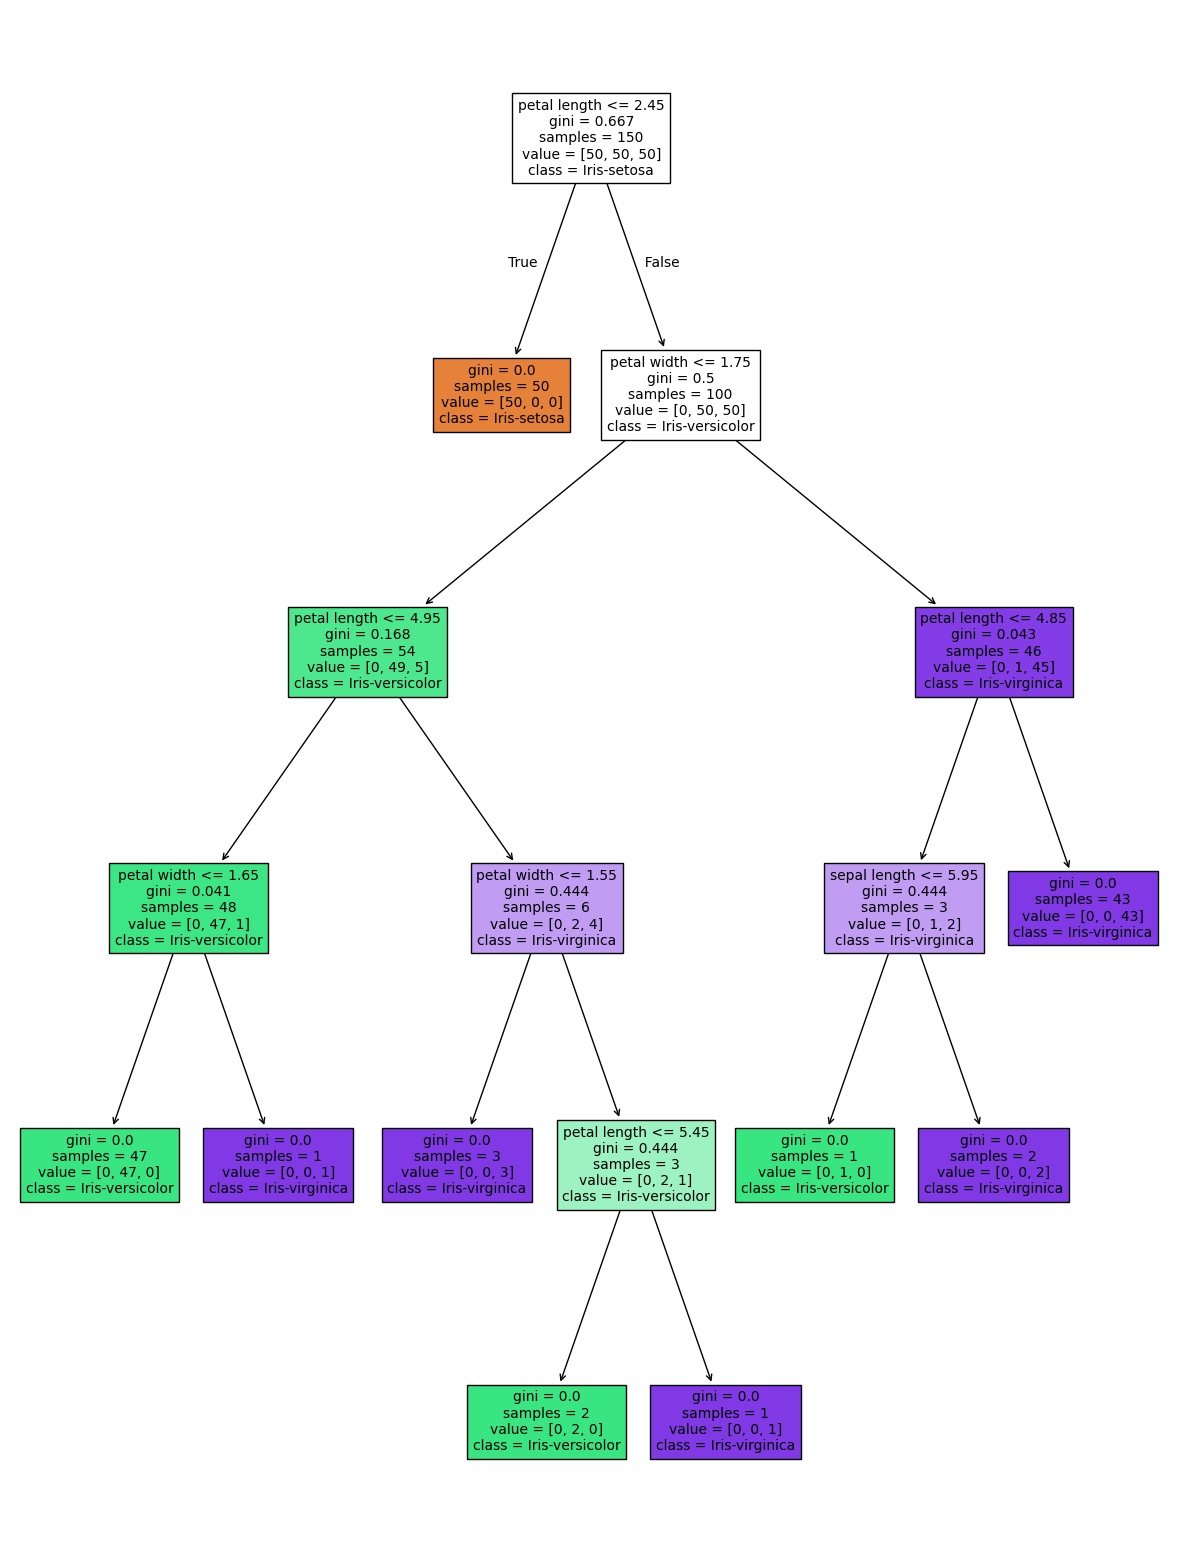

In [22]:
# 독립 변수, 종속 변수
x = iris.drop('target', axis= 1).values
y = iris['target'].values

# 모델 생성
clf = DecisionTreeClassifier(random_state= 42)

# 모델 학습
clf.fit(x, y)
feature_names = iris.drop('target', axis= 1).columns

# 트리
plt.figure(figsize= (15, 20))
plot_tree(
    clf,
    feature_names= feature_names, # feature 이름 지정
    class_names= target_list,     # 각 클래스 이름 지정
    fontsize= 10,                 # 폰트 크기 지정
    filled= True                  # 노드 색깔
)

plt.show()

---
---

# 부스팅
**빅데이터분석기사 시험 대비엔 XGBoost와 랜덤포레스트 중요**
- 모델을 순차적으로 학습시켜 성능을 향상시키는 앙상블<span style="color:#808080">(Ensemble)</span> 기법
- 이전 모델의 오류(잔차)를 보완하는 새로운 모델을 계속 추가하며 학습을 진행
- 이전 모델이 잘못 맞춘 데이터(또는 예측 오류)에 가중치/집중을 증가 -> 다음 모델에서 집중 학습
- 단순한 모델(<span style="color:#808080">Weak Learner,</span> 주로 Decision Tree)을 합쳐서 하나의 강력한 모델<span style="color:#808080">(Strong Learner)</span>로 생성
- **장점**
    - 편향<span style="color:#808080">(Bias)</span> 감소 -> 예측 성능 및 정확도가 높아진다.
    - 약한 모델의 조합만으로도 매우 높은 성능을 가진 모델을 구축할 수 있다.
    - 대규모 데이터셋과 복잡한 문제에서도 좋은 결과를 보장한다.
- **단점**
    - 순차적으로 학습 -> 모델 간 의존성이 높아 병렬 처리<span style="color:#808080">(Parallelization)</span>가 어려움 -> 학습 속도가 느려짐
    - 학습 횟수(반복)가 너무 많은 경우 -> 잔차에 과도하게 집중하여 과적합<span style="color:#808080">(Overfitting)</span> 위험이 높다.
    - 모델 복잡도가 높아 파라미터 튜닝<span style="color:#808080">(Hyperparameter Tuning)</span>이 매우 중요하고 어렵다.
- 대표 알고리즘
    - <span style="color:#ffd33d">**AdaBoost**</span> <span style="color:#808080">(Adaptive Boosting)</span>
        - 오류가 발생한 샘플에 더 높은 가중치를 부여하여 다음 모델 학습에 사용.
        - 각각의 모델들은 가중치가 조정된 데이터셋을 이용하여 학습.
        - 최종 모델은 각 모델의 성능에 따른 가중치의 합산으로 최종 결과를 결정.
    - <span style="color:#ffd33d">**Gradient Boosting**</span> <span style="color:#808080">(GBM)</span>
        - 이전 모델의 잔차<span style="color:#808080">(Residual)</span>를 새로운 종속 변수로 간주하고 이를 예측하는 새로운 모델을 추가.
        - 손실 함수<span style="color:#808080">(Loss Function)</span>를 직접 최적화하여 기울기<span style="color:#808080">(Gradient)</span> 방향으로 오류를 줄여나간다.
        - 계산량이 많고 학습 속도가 느린 편 → 후속 알고리즘(XGBoost 등) 개발의 기반.
    - <span style="color:#ffd33d">**XGBoost**</span> <span style="color:#808080">(eXtreme Gradient Boosting)</span>
        - GBM을 개선한 알고리즘 (속도, 성능, 기능 모두 향상).
        - L1/L2 규제 지원 → 과적합 방지 효과 탁월.
        - 병렬 처리 지원 → 빠른 학습 시간을 제공하여 GBM의 단점 보완.
        - 결측값 자체 처리 기능 제공.
        - 현재까지도 가장 대표적인 부스팅 알고리즘 중 하나.
    - <span style="color:#ffd33d">**LightGBM**</span> <span style="color:#808080">(Light Gradient Boosting Machine)</span>
        - XGBoost에 비해 학습 속도 및 메모리 효율성이 우수.
        - Histogram 기반 학습을 통해 대용량 데이터 처리에 최적화.
        - 균형 트리 분할<span style="color:#808080">(Level-wise)</span> 대신 리프 중심 트리 분할<span style="color:#808080">(Leaf-wise)</span>을 사용하여 분할 속도 극대화.
    - <span style="color:#ffd33d">**CatBoost**</span> <span style="color:#808080">(Categorical Boosting)</span>
        - 범주형 변수들을 전처리 없이 자동으로 효율적으로 처리.
        - 오버피팅을 방지하기 위한 새로운 방식인 순열 중요도<span style="color:#808080">(Permutation Importance)</span> 사용.
        - 비교적 하이퍼파라미터 튜닝이 간단.

---
부스팅
## AdaBoost (분류)
- 초기에는 모든 샘플의 가중치를 동일하게 부여하여 학습 시작
- 첫 번째 모델로 학습 후 → 잘못 분류한 샘플에 대해 가중치를 증가 (오류에 집중)
- 가중치가 조정된 데이터를 이용하여 다음 모델이 학습 → 이전 모델의 오류를 보완하도록 집중 학습
- 이렇게 만들어진 여러 모델의 가중 합산 (분류) <span style="color:#808080">또는 가중 평균 (회귀)</span>으로 최종 예측을 수행.

- 매개 변수
    - <span style="color:#ffd33d">**estimator**</span>
        </br>: 학습에 사용할 약한 학습기<span style="color:#808080">(Weak Learner)</span> 모델 선택
        - <span style="color:#808080">scikit-learn 구버전에서는 base_estimator였으나, 현재는 estimator로 통일.
        - 기본값: DecisionTreeClassifier(max_depth= 1)
            - DecisionTreeClassifier( ) : 가장 일반적이며, max_depth 등 매개변수를 조정하여 사용 가능.
            - LogisticRegression( ) : 확률 예측(predict_proba)을 지원해야만 AdaBoost의 SAMME.R 알고리즘에 유효하게 사용 가능.
            - SVC(Probability= True) : probability=True로 설정하여 확률 예측을 활성화해야 사용 가능.
    - <span style="color:#ffd33d">**n_estimators**</span>
        </br>: 모델(학습 단계)의 개수 (앙상블에 포함될 약한 학습기의 총 개수)
        - 개수가 많아지면 시간 증가, 과적합 위험 (단, learning_rate와 상호 보완적)
        - 기본값: 50
            - 일반적으로 50~100 사이에서 튜닝
    - <span style="color:#ffd33d">**learning_rate**</span>
        </br>: 각 단계별 기여도(가중치)를 조절하는 스케일링 값
        - n_estimator와 상호 보완적(rate를 작게 하면 모델의 개수를 크게)
        - 약한 모델의 기여도를 조절하는 스케일링 값
        - 값이 작은 경우 각 단계의 영향이 줄어듦 → 더 많은 모델이 필요하며, 더 정교한 학습이 가능해짐.
        - 데이터의 크기가
            - 작을수록 모델의 개수를 줄이고 기여도를 증가시키는 것이 유리.
            - 클수록 모델의 개수를 늘리고 기여도를 감소시키는 것이 유리.
        - 기본값: 1.0
            - 일반적으로 0.01~1
    - <span style="color:#ffd33d">**algorithm**</span>
        </br>: AdaBoost의 분류 알고리즘 선택
        - 기본값: SAMME.R  <span style="color:#808080">(Stagewise Additive Modeling using a Multiclass Exponential loss function, Real)</span>
            - SAMME.R : 확률을 사용. 보통 시간이 빠르고 성능이 우수하여 권장됨.  (estimator가 predict_proba를 지원해야 함)
            - SAMME : 클래스별 점수 기반. 확률이 필요 없지만 SAMME.R보다 느리고 덜 정교함.

- 속성
    - <span style="color:#ffd33d">**estimators_**</span>
        </br>: 학습 과정에서 생성된 약한 학습기(모델)들의 리스트
    - <span style="color:#ffd33d">**estimators_weights_**</span>
        </br>: 각 단계별 모델이 최종 결정에 기여하는 가중치  (분류에서 중요)
        - 오분류율에 반비례함 → 성능이 좋은 모델의 가중치가 높음
    - <span style="color:#ffd33d">**estimators_errors_**</span>
        </br>: 각 단계별 모델의 오차율
        - 이 오차율에 따라 다음 단계 샘플의 가중치가 조정됨
    - <span style="color:#ffd33d">**features_infortanses_**</span>
        </br>: feature별 중요도 (각 약한 학습기의 중요도를 가중 합산하여 계산됨)
- 메소드
    - <span style="color:#ffd33d">**fit(X, y)**</span>
        </br>: 모델 학습 <span style="color:#808080">(독립 변수 X, 종속 변수 y)
    - <span style="color:#ffd33d">**predict(X)**</span>
        </br>: 예측값 생성
        - <span style="color:#808080">데이터 X에 대한 최종 예측값(클래스 라벨 또는 회귀 값)을 생성
    - <span style="color:#ffd33d">**predict_proba(X)**</span>
        </br>: 각 클래스별로 예측될 확률 반환.
        - 주로 SAMME.R에서 유효하며, 최종 가중 합산 결과를 확률로 변환
    - <span style="color:#ffd33d">**decision_function(x)**</span>
        </br>: 결정 경계로부터의 거리 (결정 함수의 값)
    - <span style="color:#ffd33d">**staged_predict(X)**</span> / <span style="color:#ffd33d">**staged_predict_proba(X)**</span>
        </br>: 각 단계별로 누적된 모델의 예측을 순차적으로 제공 (학습 곡선 분석에 유용)

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [24]:
# bodyPerformance 데이터를 로드
body = pd.read_csv("../data/bodyPerformance.csv")
body.head(1)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C


In [25]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [26]:
# 이진 분류보다 4개로 분류하는 게 성능이 더 떨어질 수 밖에 없음
# 이진 분류가 가능하면 이진으로, 다중 분류해야 하면 map() 사용

# Object형 데이터를 수치형 데이터로 변환
# gender 컬럼의 M은 0, F는 1로 변환
# np.where( 조건식, 참인 경우의 데이터, 거짓인 경우의 데이터 )
body['gender'] = np.where(body['gender'] == 'M', 0, 1)

body['gender'].value_counts()

gender
0    8467
1    4926
Name: count, dtype: int64

In [27]:
# class 컬럼의 A는 0, B는 1, C는 2, D는 3으로 변환
# where을 사용해도 되지만, map() 사용이 훨씬 간단
body['class'] = body['class'].map(
    {
        'A' : 0,
        'B' : 1,
        'C' : 2,
        'D' : 3
    }
)

body['class'].value_counts()

class
2    3349
3    3349
0    3348
1    3347
Name: count, dtype: int64

In [28]:
# 독랍 변수의 데이터와 종속 변수의 데이터로 나눠준다.
x = body.drop('class', axis= 1).values
y = body['class'].values

# 독립 변수 컬럼의 이름들만 따로 저장 (feature_imfortance 확인에 사용)
feature_names = body.columns.difference(['class'])

In [29]:
# train, test 8:2로 데이터 분할
# y의 값들의 개수가 1:1:1:1 비율을 유지하기 때문에, train 데이터에서도 비율 유지
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size= 0.2, random_state= 42,
    stratify= y
)

In [30]:
# AdaBoost 생성 (기본값 사용)
clf = AdaBoostClassifier()

# train 데이터를 이용해 학습
clf.fit(X_train, Y_train)

print("정확도: ", clf.score(X_test, Y_test))
# 정확도 약 54%로 매우 떨어지는 편
# 어떻게 올리는지 아래에서 하나씩 확인

정확도:  0.545726017170586


In [31]:
clf2 = AdaBoostClassifier(
    estimator= DecisionTreeClassifier(max_depth= 4),
    n_estimators= 500, learning_rate= 0.1
)

clf2.fit(X_train, Y_train)
print("정확도: ", clf2.score(X_test, Y_test))
# max_depth 넣으니까 정확도 많이 올랐다!
# n_estimators= 500, learning_rate= 0.1 --> 정확도 약 70%로 오른다!
# n_estimators= 30, learning_rate= 1    --> 정확도 약 65%

정확도:  0.7013811123553565


In [32]:
# 분류 분석의 평가
pred = clf2.predict(X_test)

In [33]:
# 혼동 행렬 생성
cm = confusion_matrix(Y_test, pred)
acc = accuracy_score(Y_test, pred)
# prc = precision_score(Y_test, pred)   <-- 이진 분류면 괜찮지만, 다중 분류이므로 그대로 쓰면 Error
# rcll = recall_score(Y_test, pred)
# f1 = f1_score(Y_test, pred)
prc = precision_score(Y_test, pred, average= 'micro')
rcll = recall_score(Y_test, pred, average= 'micro')
f1 = f1_score(Y_test, pred, average= 'micro')
# 다중 클래스 분류에서는 정밀도, 재현율, f1score는 average 매개변수에 인자를 설정
# micro: 전체의 TP/FP/FN 을 합쳐 계산한다. -> 클래스의 불균형에 둔감해, 전체의 정확도와 비슷하게 출력
# macro: 클래스별 평균(가중치와 동일) -> 클래스의 불균형에 민감
# weighted: 각 클래스별 샘플의 수로 가중 평균을 구한다. -> 클래스의 불균형에 적합

print(cm)
print("정확도 : ", round(acc, 2))
print("정밀도 : ", round(prc, 2))
print("재현율 : ", round(rcll, 2))
print("f1 : ", round(f1, 2))

[[513 155   2   0]
 [142 426  88  13]
 [ 60 163 411  36]
 [ 11  50  80 529]]
정확도 :  0.7
정밀도 :  0.7
재현율 :  0.7
f1 :  0.7


In [34]:
# feature별 중요도 확인
importances = clf2.feature_importances_
# feature_names를 이용하여 데이터프레임 생성
feature_names_df = pd.DataFrame(feature_names)
# feature_name_df와 importances가 결합된 하나의 데이터프레임 생성
feature_df = pd.concat( [feature_names_df, pd.DataFrame(importances)], axis= 1  )
feature_df.columns = ['feature_names', 'importance']
feature_df.sort_values('importance', ascending= False)

,feature_names,importance
8,sit-ups counts,0.457499
9,systolic,0.186986
0,age,0.136062
4,gender,0.062424
3,diastolic,0.050972
7,sit and bend forward_cm,0.048572
1,body fat_%,0.029951
10,weight_kg,0.020513
2,broad jump_cm,0.004657
5,gripForce,0.001211


---
부스팅
## AdaBoost (회귀)
- 여러 개의 약한 회귀 모델을 순차적으로 학습하여 이전 단계의 잔차를 줄이도록 가중치를 조절하여 높은 성능의 회귀 모델을 생성
- 최종 예측은 일반적으로 각 모델의 예측값에 대한 가중 평균으로 수행.

- 매개 변수
    - <span style="color:#ffd33d">**estimator**</span>
        </br>: 학습에 사용할 약한 회귀 모델 선택
        - 기본값: DecisionTreeRegressor(max_depth= 3)
        </br>(분류와 달리 max_depth가 3으로 깊음)
            - DecisionTreeRegressor() : 매개변수를 조정하여 사용 가능.
            - LinearRegressor(), SVR(), Ridge(): 회귀 모델도 약한 학습기로 사용 가능.
    - <span style="color:#ffd33d">**n_estimator**</span>
        </br>: 모델의 개수
        - 앙상블에 포함될 약한 회귀 모델의 총 개수
        - 개수가 많아지면 시간 증가, 과적합 위험
        - 기본값: 50
            - 일반적으로 50~100 사이에서 튜닝
    - <span style="color:#ffd33d">**learning_rate**</span>
        </br>: 각 단계별 기여도(가중치)를 조절하는 스케일링 값
        - n_estimator와 상호 보완적(rate를 작게 하면 모델의 개수를 크게)
        - 약한 모델의 기여도를 조절하는 스케일링 값
        - 값이 작은 경우 각 단계의 영향이 줄어듦 → 더 많은 모델이 필요하며, 더 정교한 학습이 가능해짐.
        - 데이터의 크기가
            - 작을수록 모델의 개수를 줄이고 기여도를 증가시키는 것이 유리.
            - 클수록 모델의 개수를 늘리고 기여도를 감소시키는 것이 유리.
        - 기본값: 1.0
            - 일반적으로 0.01~1
        - 기본값: 1.0
            - 일반적으로 0.1~1
    <span style="color:#ffd33d">**loss**</span>
        </br>: 오차에 대한 가중치의 변환 방식 지정
        - 오차(Error)를 어떻게 측정하고 가중치에 반영할지 결정
        - 기본값: linear
            - linear : 기본적인 선형 업데이트 (오차 크기에 비례하여 가중치 증가)
            - square : 오차를 제곱하여 업데이트 → 큰 오차에 더 민감하게 가중치를 부여
            - exponential : 오차를 지수 함수로 변환하여 업데이트 → 매우 큰 오차에 가장 강하게 패널티를 부여

- 속성
    - <span style="color:#ffd33d">**estimators_**</span>
        </br>: 학습된 약한 회귀 모델의 리스트
    - <span style="color:#ffd33d">**estimators_weights_**</span>
        </br>: 각 단계별 모델이 최종 예측에 기여하는 가중치
    - <span style="color:#ffd33d">**estimators_errors_**</span>
        </br>: 각 단계별 모델의 훈련에서의 오차. (내부 loss 설정에 따라 평균 절댓값 또는 평균 제곱 오차 지표로 생성됨)

In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# 데이터 로드
car = pd.read_csv('../data/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [37]:
# Car 데이터프레임에서 dtype이 숫자인 컬럼들만 필터
# 각 컬럼별 dtype 확인 -> 숫자형이라면 빈 리스트에 해당 컬럼명 추가
col_list = []

for col in car.columns:
    # col: 각 컬럼의 이름을 대입하여 반복
    # 조건식 - 데이터프레임에서 특정 컬럼을 선택하여 dtype이 ['int64', 'float64'] 에 포함되어 있다면
    if car[col].dtype in ['int64', 'float64']:
        col_list.append(col)
car[col_list]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [38]:
# 또는 더 간단하게
# 특정 dtype들을 선택하는 함수 select_dtypes() 를 이용
# car.select_dtypes(['int64', 'float64'])
car_num = car.select_dtypes('number')
car_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [39]:
# 특정 컬럼을 제외
feature_names = car_num.columns.difference(['car_ID', 'symboling', 'price'])

x = car_num[feature_names].values
y = car_num['price'].values

In [40]:
# train, test 7:3으로 분할
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size= 0.3, random_state= 42
)

In [54]:
# 모델 생성 (기본값)
reg = AdaBoostRegressor()

reg.fit(X_train, Y_train)
pred = reg.predict(X_test)

# 평가
mse = mean_squared_error(Y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, pred)
r2 = r2_score(Y_test, pred)

print('MSE : ', round(mse, 2))
print('RMSE : ', round(rmse, 2))
print('MAE : ', round(mae, 2))
print('R2 : ', round(r2, 2))

MSE :  6438018.96
RMSE :  2537.33
MAE :  1949.48
R2 :  0.91


In [42]:
car_num.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [43]:
# 정답
Y_test[0]

np.float64(30760.0)

In [44]:
# 각 단계별 중간 예측
pred_list = []
for _pred in list(reg.staged_predict(X_test)):
    # print(mean_absolute_error(Y_test, pred))
    pred_list.append(mean_absolute_error(Y_test, _pred))

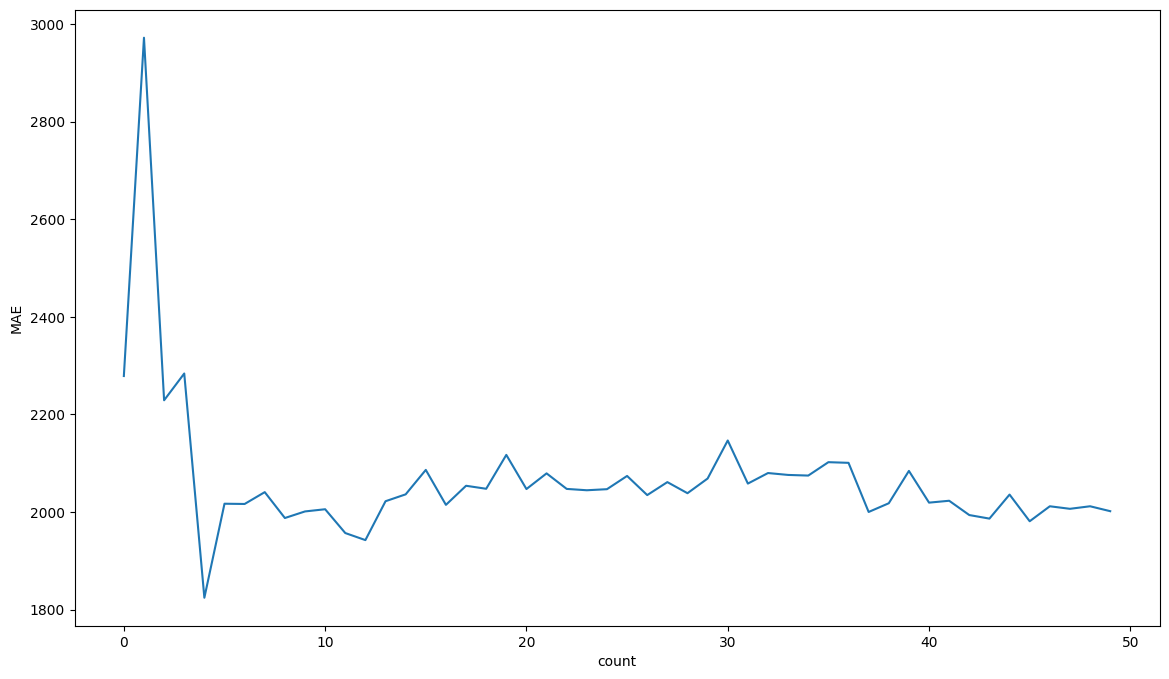

In [45]:
# 평균 절대 오차의 변화율 시각화
plt.figure(figsize=(14, 8))
plt.plot(pred_list)
plt.xlabel('count')
plt.ylabel('MAE')
plt.show()

In [46]:
# 각 피쳐별 중요도
importances = reg.feature_importances_
feature_names_df = pd.DataFrame(feature_names, columns= ['feature_name'])
feature_names_df['importance'] = importances
feature_names_df

,feature_name,importance
0,boreratio,0.010603
1,carheight,0.005382
2,carlength,0.039084
3,carwidth,0.058003
4,citympg,0.025832
5,compressionratio,0.006969
6,curbweight,0.097129
7,enginesize,0.548906
8,highwaympg,0.059818
9,horsepower,0.108391


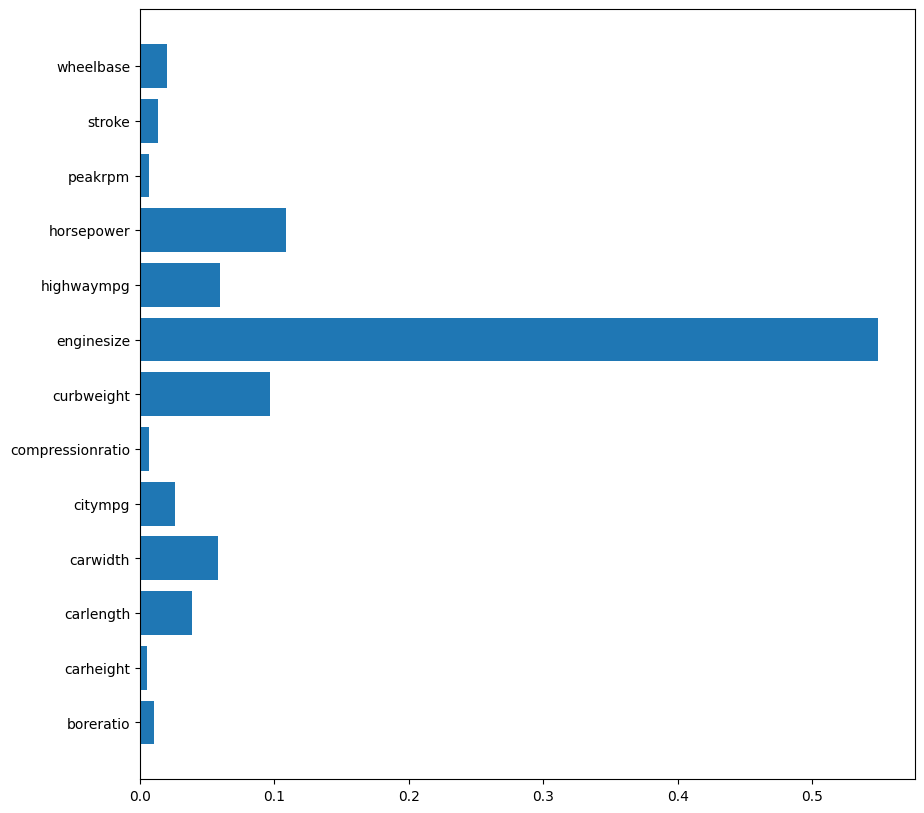

In [47]:
# 피쳐별 중요도를 누운 막대 그래프로 시각화
plt.figure(figsize=(10, 10))
plt.barh( feature_names_df['feature_name'], feature_names_df['importance'])

plt.show()